In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from math import sqrt

ModuleNotFoundError: No module named 'matplotlib.artist'

In [3]:
# load data
data = pd.read_excel("C:\\Users\\ninag\\Desktop\\scripts\\monthly_in_situ_co2_mlo (1).xls")
data

,monthly_in_situ_co2_mlo,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Ω,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.70,317.88,315.06,317.51,314.70
...,...,...,...,...,...,...,...,...,...,...
775,2022,8,44788,2022.6219,416.76,418.31,416.78,418.37,416.76,418.31
776,2022,9,44819,2022.7068,415.41,418.91,415.04,418.56,415.41,418.91
777,2022,10,44849,2022.7890,415.31,418.93,-99.99,-99.99,415.31,418.93
778,2022,11,44880,2022.8740,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99


In [25]:
yr, mo, co2 = data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 8]

In [33]:
df = pd.DataFrame({'year': yr.to_list()[1:], 
                    'month': mo.to_list()[1:],
                    'day': [15] * (len(yr) - 1)})

tm = pd.to_datetime(df)

In [90]:
i = co2 > 0
tm, co2, yr = tm[i], co2[i], yr[i]
YR = [i for i in range(min(yr), max(yr) + 1)]
n = len(YR)

In [122]:
n1 = 32
n2 = 33
Y1 = np.mean(YR[:n1])
Y2 = np.mean(YR[n1:])

In [80]:
def detrend(x, y, dim):
    model = np.polyfit(x, y, dim)
    predicted = np.polyval(model, x)
    return y - predicted


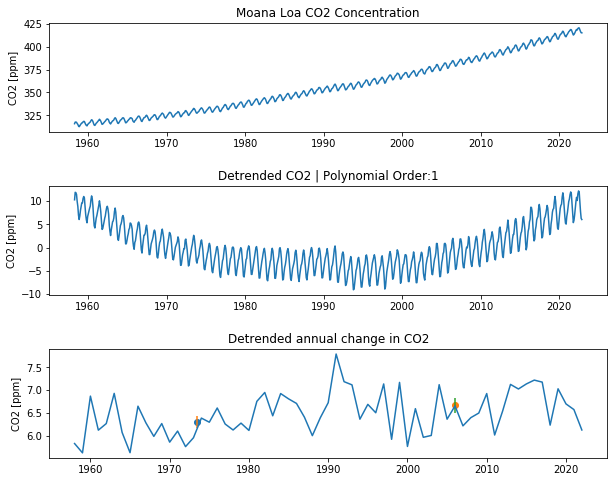

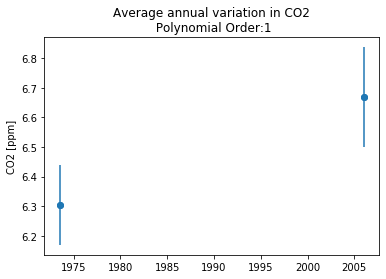

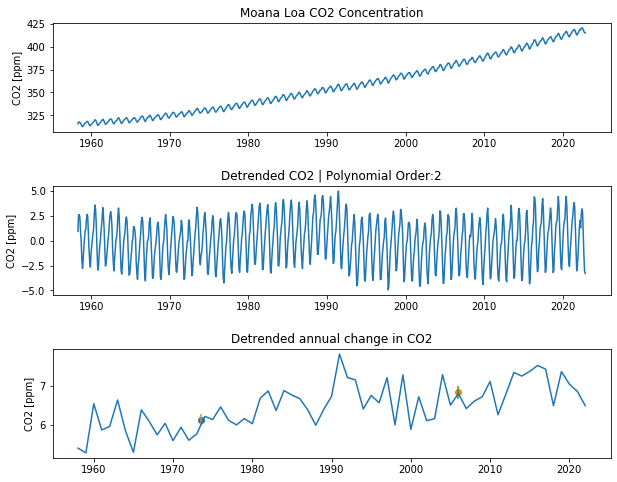

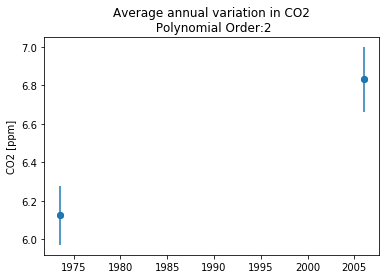

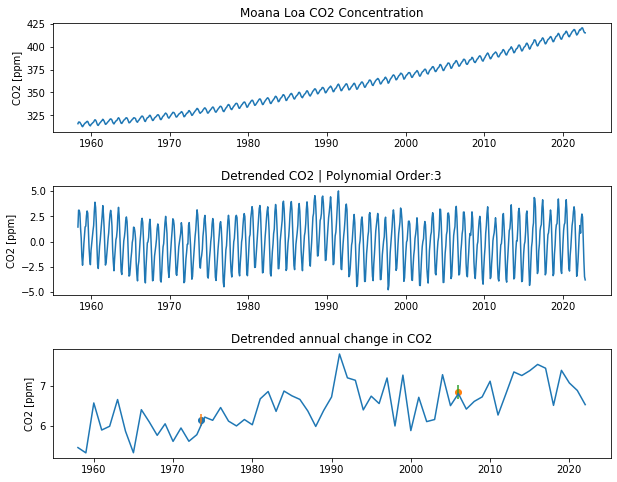

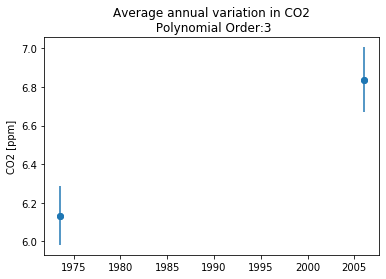

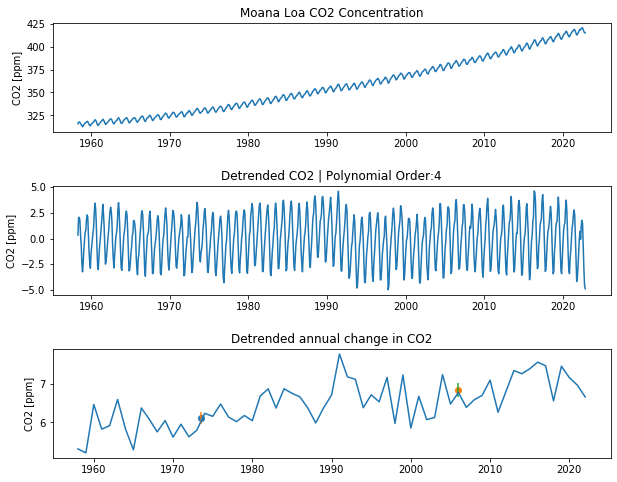

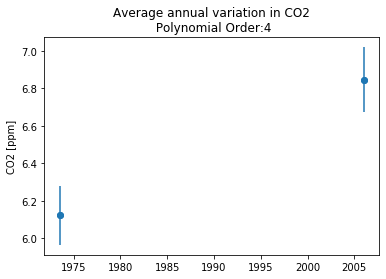

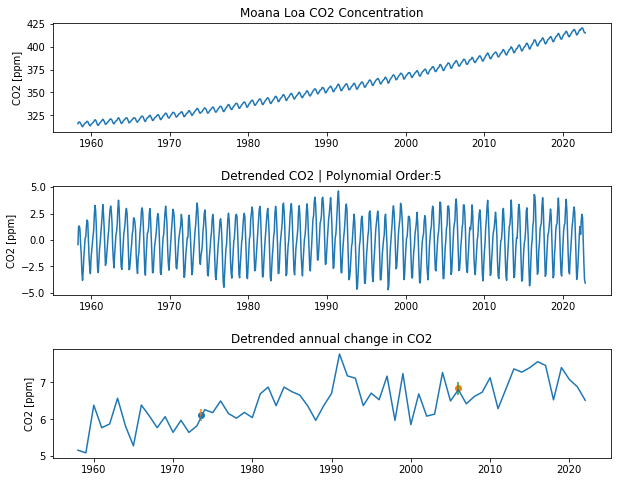

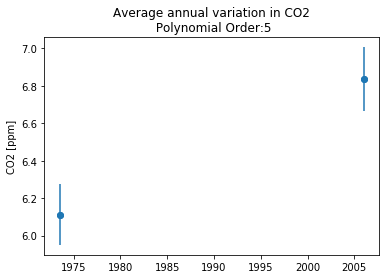

In [139]:
NUM_OF_PLOTS = 5
for i in range(NUM_OF_PLOTS):
    fig, axs = plt.subplots(3, 1, figsize=(10,8))
    plt.subplots_adjust(hspace=0.5)
    axs[0].plot(tm, co2)
    axs[0].set(title='Moana Loa CO2 Concentration', ylabel='CO2 [ppm]')

    detrended_co2 = detrend([i for i in range(len(co2))], co2.to_list(), i+1)
    axs[1].plot(tm, detrended_co2)
    axs[1].set(title=f'Detrended CO2 | Polynomial Order:{i+1}', ylabel='CO2 [ppm]')
    del_co2 = []

    for year in range(min(yr), max(yr) + 1):
        temp = detrended_co2[yr == year]
        del_co2.append(max(temp) - min(temp))

    axs[2].plot(YR, del_co2)
    axs[2].set(title='Detrended annual change in CO2', ylabel='CO2 [ppm]')

    del_co21 = np.mean(del_co2[:n1])
    del_co22 = np.mean(del_co2[n1:])

    std1 = np.std(del_co2[:n1])
    std2 = np.std(del_co2[n1:])

    stderr1 = std1/sqrt(n1)
    stderr2 = std2/sqrt(n2)

    ci1_95 = st.t.ppf(0.975,  n1) * stderr1
    ci2_95 = st.t.ppf(0.975,  n2) * stderr2

    
    axs[2].scatter(Y1, del_co21)
    axs[2].scatter(Y2, del_co22)
    axs[2].errorbar(Y1, del_co21, yerr=ci1_95)
    axs[2].errorbar(Y2, del_co22, yerr=ci2_95)

    fig2 = plt.figure()
    a=[Y1,Y2]
    b=[del_co21, del_co22]
    plt.scatter(a, b)
    plt.errorbar(a, b, yerr=[ci1_95,ci2_95], fmt='o')
    plt.title(f'Average annual variation in CO2\n Polynomial Order:{i+1}')
    plt.ylabel('CO2 [ppm]')

    